# Data plotting

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Paired')
sns.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Read data

In [14]:
data = pd.read_csv('data/medicare_data_disease.csv')
data.head()

,Unnamed: 0,TTDDRUGID,LNM,Indication,ICD9,ICD10
0,0,DAP000001,quetiapine,Schizophrenia,"295, 710.0","F20, M32"
1,1,DAP000002,theophylline,Chronic obstructive pulmonary disease,"490-492, 494-496","J40-J44, J47"
2,2,DAP000003,risperidone,Schizophrenia,"295, 710.0","F20, M32"
3,3,DAP000004,dasatinib,Chronic myelogenous leukemia,"205.1, 208.9","C91-C95, C92.1"
4,4,DAP000004,dasatinib,Solid tumours; Multiple myeloma,"140-199, 203.0, 210-229","C00-C75, C7A, C7B, C90.0, D10-D36, D3A"


In [15]:
diseases = pd.read_csv('data/drug-disease_keys.csv')
diseases.head()

,Unnamed: 0,TTDDRUGID,LNM,Indication,ICD9,ICD10
0,0,DAP000001,quetiapine,Schizophrenia,"295, 710.0","F20, M32"
1,1,DAP000002,theophylline,Chronic obstructive pulmonary disease,"490-492, 494-496","J40-J44, J47"
2,2,DAP000003,risperidone,Schizophrenia,"295, 710.0","F20, M32"
3,3,DAP000004,dasatinib,Chronic myelogenous leukemia,"205.1, 208.9","C91-C95, C92.1"
4,4,DAP000004,dasatinib,Solid tumours; Multiple myeloma,"140-199, 203.0, 210-229","C00-C75, C7A, C7B, C90.0, D10-D36, D3A"


## Figure 1: top indications for total spending in 5-year period

In [16]:
spending = data.groupby('Indication').sum().sort_values(by='Total Spending', ascending=False)
spending.head()

,Unnamed: 0,Claim Count,Total Spending,Beneficiary Count,Total Annual Spending Per User,Unit Count,Average Cost Per Unit (Weighted),Beneficiary Count No LIS,Average Beneficiary Cost Share No LIS,Beneficiary Count LIS,Average Beneficiary Cost Share LIS,Year
Brand Name,,,,,,,,,,,,
lantus/lantus solostar,10560,40959410.0,1.419734e+10,7627126.0,9059.358978,7.905816e+08,87.058010,3685935.0,1757.877943,3941191.0,119.054297,10065
nexium,13330,37338541.0,1.129409e+10,6968266.0,8159.874433,1.624007e+09,35.029401,2808631.0,1282.120804,4159635.0,108.193170,10065
crestor,4670,43304032.0,1.084924e+10,8312848.0,6460.499385,1.917524e+09,27.902605,5275631.0,1477.330224,3037217.0,126.576936,10065
advair diskus,385,30806126.0,1.036056e+10,7096159.0,7313.316443,2.273054e+09,22.805665,3613170.0,1284.084879,3482989.0,98.586905,10065
abilify,45,12506518.0,9.434570e+09,1861785.0,25165.999223,3.818410e+08,127.685877,333884.0,2541.346071,1527901.0,101.829169,10065


In [18]:
spending_drug = data.groupby('Brand Name').sum().sort_values(by='Total Spending', ascending=False)
spending_drug.head()

,Unnamed: 0,Claim Count,Total Spending,Beneficiary Count,Total Annual Spending Per User,Unit Count,Average Cost Per Unit (Weighted),Beneficiary Count No LIS,Average Beneficiary Cost Share No LIS,Beneficiary Count LIS,Average Beneficiary Cost Share LIS,Year
Brand Name,,,,,,,,,,,,
lantus/lantus solostar,10560,40959410.0,1.419734e+10,7627126.0,9059.358978,7.905816e+08,87.058010,3685935.0,1757.877943,3941191.0,119.054297,10065
nexium,13330,37338541.0,1.129409e+10,6968266.0,8159.874433,1.624007e+09,35.029401,2808631.0,1282.120804,4159635.0,108.193170,10065
crestor,4670,43304032.0,1.084924e+10,8312848.0,6460.499385,1.917524e+09,27.902605,5275631.0,1477.330224,3037217.0,126.576936,10065
advair diskus,385,30806126.0,1.036056e+10,7096159.0,7313.316443,2.273054e+09,22.805665,3613170.0,1284.084879,3482989.0,98.586905,10065
abilify,45,12506518.0,9.434570e+09,1861785.0,25165.999223,3.818410e+08,127.685877,333884.0,2541.346071,1527901.0,101.829169,10065


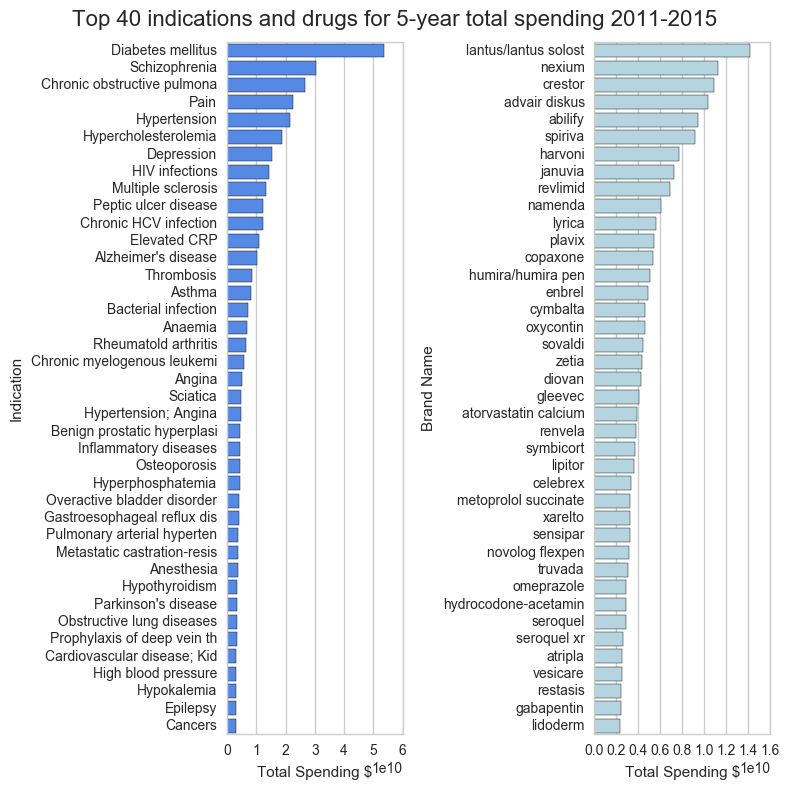

In [5]:
n_top = 40
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(8,8))
g = sns.barplot(x='Total Spending', y='Indication', data=spending.reset_index()[:n_top], estimator=np.sum, ax=ax1, 
                color=sns.xkcd_rgb['dodger blue'])
g.set(yticklabels=[i[:27] for i in spending[:n_top].index])
g.set_xlabel('Total Spending $')
g2 = sns.barplot(x='Total Spending', y='Brand Name', data=spending_drug.reset_index()[:n_top], estimator=np.sum, ax=ax2,
                 color='lightblue')
g2.set(yticklabels=[i[:20] for i in spending_drug[:n_top].index])
g2.set_xlabel('Total Spending $')
#plt.title('Top 50 indications by Beneficiary Count Sum from 2011 to 2015')
fig.suptitle('Top %s indications and drugs for 5-year total spending 2011-2015' %n_top, size=16)
plt.tight_layout()
fig.subplots_adjust(top=0.94)
plt.savefig('Top_%s_disease_drug.png' %n_top, dpi=300, bbox_inches='tight')

## Figure 2: top drug cost development 2011-2015 and top indications 2015

In [21]:
spend_2015_ind = data[data['Year']==2015].groupby('Indication').sum().sort_values(by='Total Spending', ascending=False)
#spend_2015_drug = data[data['Year']==2015].groupby('Brand Name').sum().sort_values(by='Total Spending', 
# ascending=False)
spend_2015_ind.head()

,Brand Name,Total Spending,Year
19770,harvoni,7.030633e+09,2015
20104,lantus/lantus solostar,4.359504e+09,2015
18926,crestor,2.883122e+09,2015
18069,advair diskus,2.270016e+09,2015
21640,spiriva,2.191466e+09,2015
19988,januvia,2.131952e+09,2015
21404,revlimid,2.077425e+09,2015
20658,nexium,2.012921e+09,2015
20291,lyrica,1.766474e+09,2015
19818,humira/humira pen,1.662292e+09,2015


In [23]:
top_10_spend = data[data['Year']==2015].sort_values(by='Total Spending', ascending=False)[['Brand Name', 
                                                                                           'Total Spending', 
                                                                                           'Year']][:10]
top_10_spend

,Brand Name,Total Spending,Year
19770,harvoni,7.030633e+09,2015
20104,lantus/lantus solostar,4.359504e+09,2015
18926,crestor,2.883122e+09,2015
18069,advair diskus,2.270016e+09,2015
21640,spiriva,2.191466e+09,2015
19988,januvia,2.131952e+09,2015
21404,revlimid,2.077425e+09,2015
20658,nexium,2.012921e+09,2015
20291,lyrica,1.766474e+09,2015
19818,humira/humira pen,1.662292e+09,2015


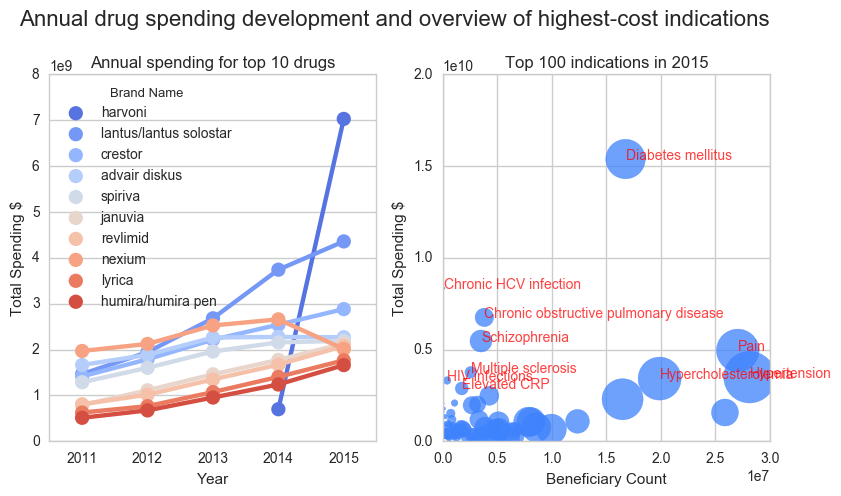

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(8,5))

g=sns.factorplot(x='Year', y='Total Spending', hue='Brand Name', palette='coolwarm', 
                 hue_order=top_10_spend['Brand Name'],
                 data=data[data['Brand Name'].isin(top_10_spend['Brand Name'])], ax=ax1)
ax1.set_title('Annual spending for top 10 drugs')
ax1.set_ylabel('Total Spending $')
plt.close(g.fig)

ax2.scatter(x=spend_2015_ind['Beneficiary Count'][:100], 
            y=spend_2015_ind['Total Spending'][:100],
            s=spend_2015_ind['Claim Count'][:100]/100000,
            #c=spend_2015_ind.reset_index()['Indication'][:100])
            color=sns.xkcd_rgb['dodger blue'], alpha=0.75)
ax2.set_title('Top 100 indications in 2015')
plt.xlabel('Beneficiary Count')
plt.ylabel('Total Spending $')
plt.axis([0, None, 0, None])
for label, x, y in zip(spend_2015_ind.index, 
                       spend_2015_ind['Beneficiary Count'][:10], 
                       spend_2015_ind['Total Spending'][:10]):
    plt.annotate(label, xy=(x, y), color='red', alpha=0.75)
fig.suptitle('Annual drug spending development and overview of highest-cost indications', size=16)
plt.tight_layout()
fig.subplots_adjust(top=0.85)
plt.savefig('Top_bubble_disease_drug.png', dpi=300, bbox_inches='tight')

### Drafts

In [ ]:
plt.figure(figsize=(6,12))
g = sns.barplot(x='Total Spending', y='Indication', data=spending.reset_index()[:50], estimator=np.sum)
g.set(yticklabels=[i[:30] for i in spending[:100].index])
plt.title('Top 50 indications by Total Spending (USD) Sum from 2011 to 2015')
plt.savefig('Top_50_indications_spending.png', dpi=300, bbox_inches='tight')

In [ ]:
plt.scatter(x=spend_2015_ind['Beneficiary Count'][:100], 
            y=spend_2015_ind['Total Spending'][:100],
            s=spend_2015_ind['Claim Count'][:100]/100000,
            #c=spend_2015_ind.reset_index()['Indication'][:100])
            color=sns.xkcd_rgb['dodger blue'], alpha=0.75)
ax2.set_title('Top 100 indications in 2015')
plt.xlabel('Beneficiary Count')
plt.ylabel('Total Spending')
plt.axis([0, None, 0, None])
for label, x, y in zip(spend_2015_ind.index, 
                       spend_2015_ind['Beneficiary Count'][:10], 
                       spend_2015_ind['Total Spending'][:10]):
    plt.annotate(label, xy=(x, y), color='red', alpha=0.75)
plt.show()

In [ ]:
plt.scatter(x=spend_2015_drug['Beneficiary Count'][:100], 
            y=spend_2015_drug['Total Spending'][:100],
            s=spend_2015_drug['Claim Count'][:100]/50000,
            #c=spend_2015_ind.reset_index()['Indication'][:100])
            color=sns.xkcd_rgb['dodger blue'], alpha=0.75)
ax2.set_title('Top 100 drugs in 2015')
plt.xlabel('Beneficiary Count')
plt.ylabel('Total Spending')
plt.axis([0, None, 0, None])

for label, x, y in zip(spend_2015_drug.index, spend_2015_drug['Beneficiary Count'][:10], 
                       spend_2015_drug['Total Spending'][:10]):
    plt.annotate(
        label,
        xy=(x, y),# xytext=(x, y+1),
        alpha=0.75)
        #textcoords='offset points', ha='right', va='bottom',
        #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        #arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

for label, x, y in zip(spend_2015_drug.sort_values('Beneficiary Count', ascending=False).index,
                       spend_2015_drug.sort_values('Beneficiary Count', ascending=False)['Beneficiary Count'][:1], 
                       spend_2015_drug.sort_values('Beneficiary Count', ascending=False)['Total Spending'][:1]):
    plt.annotate(
        label,
        xy=(x, y),# xytext=(x, y*2),
        rotation=10, #ha='right', va='bottom',
        #arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'),
        alpha=0.75)

for label, x, y in zip(spend_2015_drug.sort_values('Claim Count', ascending=False).index,
                       spend_2015_drug.sort_values('Claim Count', ascending=False)['Beneficiary Count'][:5], 
                       spend_2015_drug.sort_values('Claim Count', ascending=False)['Total Spending'][:5]):
    plt.annotate(
        label,
        xy=(x, y),# xytext=(x, y*2),
        rotation=10, #ha='right', va='bottom',
        #arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'),
        alpha=0.75)

#plt.legend()
#plt.savefig('Top_100_indications_bubbles.png', dpi=300, bbox_inches='tight')

In [ ]:
sns.swarmplot(x='Indication', y='Total Spending', 
              data=data[data['Year']==2015].sort_values(by='Total Spending', ascending=False)[:1000])

In [ ]:
sns.factorplot(x='Year', y='Total Spending', data=data)

In [ ]:
sns.jointplot(x='Beneficiary Count', y='Total Spending',
              data=data[data['Year']==2015])#[data['Brand Name'].isin(top_10_spend['Brand Name'])])

In [ ]:
sns.factorplot(x='Year', y='Total Spending', hue='Brand Name', data=data[data['Brand Name'].isin(['truvada', 
                                                                                                  'zovirax', 
                                                                                                  'harvoni'])])

In [ ]:
sns.factorplot(x='Year', y='Beneficiary Count', hue='Brand Name', data=data[data['Brand Name'].isin(['truvada', 
                                                                                                  'zovirax', 
                                                                                                  'harvoni'])])